# Module 5 R Exercise

In these exercises, we will use ggplot2 layered approach to create plots similar to the ones in the practice. 

Let's start with the U.S. Census Bureau population projections.

In [1]:
library(ggplot2)
library(RColorBrewer)

pproj = read.csv("/dsa/data/all_datasets/census/pop_proj.csv")
head(pproj)
summary(pproj)


sex,age,year,pop
<fct>,<fct>,<int>,<int>
Female,Under 5 years,2015,9755
Female,5 to 13 years,2015,18047
Female,14 to 17 years,2015,8207
Female,18 to 24 years,2015,15196
Female,25 to 44 years,2015,42098
Female,45 to 64 years,2015,43021


     sex                    age         year           pop       
 Female:28   14 to 17 years   :8   Min.   :2015   Min.   : 8173  
 Male  :28   18 to 24 years   :8   1st Qu.:2019   1st Qu.:10690  
             25 to 44 years   :8   Median :2022   Median :18773  
             45 to 64 years   :8   Mean   :2022   Mean   :24332  
             5 to 13 years    :8   3rd Qu.:2026   3rd Qu.:40819  
             65 years and over:8   Max.   :2030   Max.   :48846  
             Under 5 years    :8                                 

**This data set has seven age brackets instead of each and every age**. Years show the projection years of the male and female population in United States, and population is given in 1000s. 

**Exercise 1:** Create a **bar plot** to show the age bracket distribution of the total population in year **2015**. 

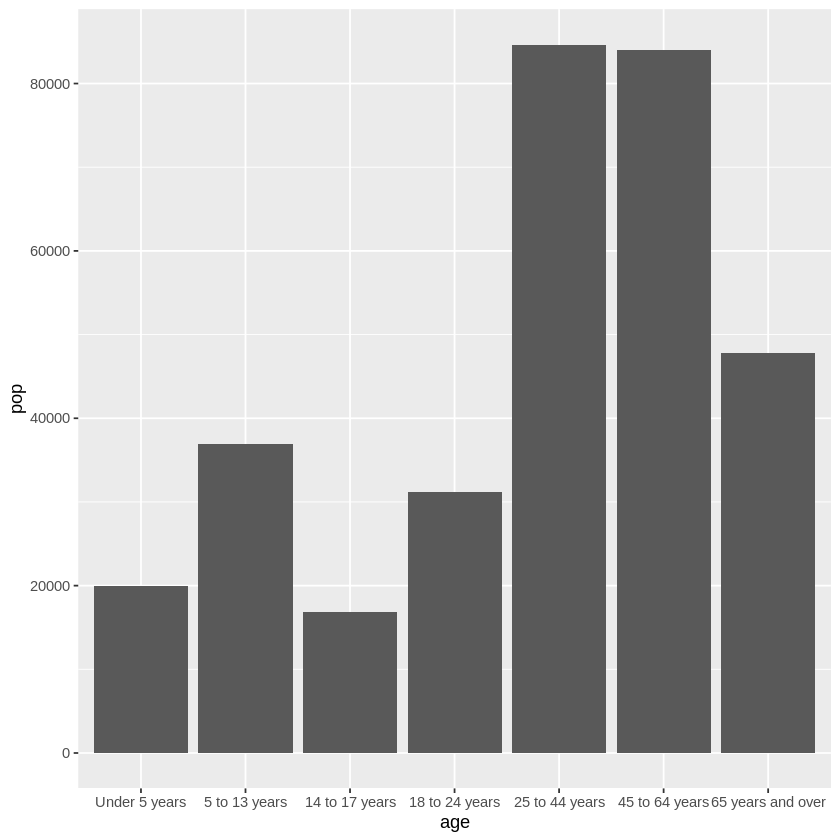

In [5]:
# Remember how to do a bar chart with actual values instead of counts. You should use "identity" statistics. 

ggplot(pproj, aes(x=age, y=pop)) +
geom_bar(data = subset(pproj, year==2015), stat="identity") +

# this is to order the x axis 
scale_x_discrete(limits = c("Under 5 years","5 to 13 years","14 to 17 years","18 to 24 years","25 to 44 years", 
                            "45 to 64 years","65 years and over"))

**Exercise 2:** Create a **pie chart** for the same data in exercise 1. 

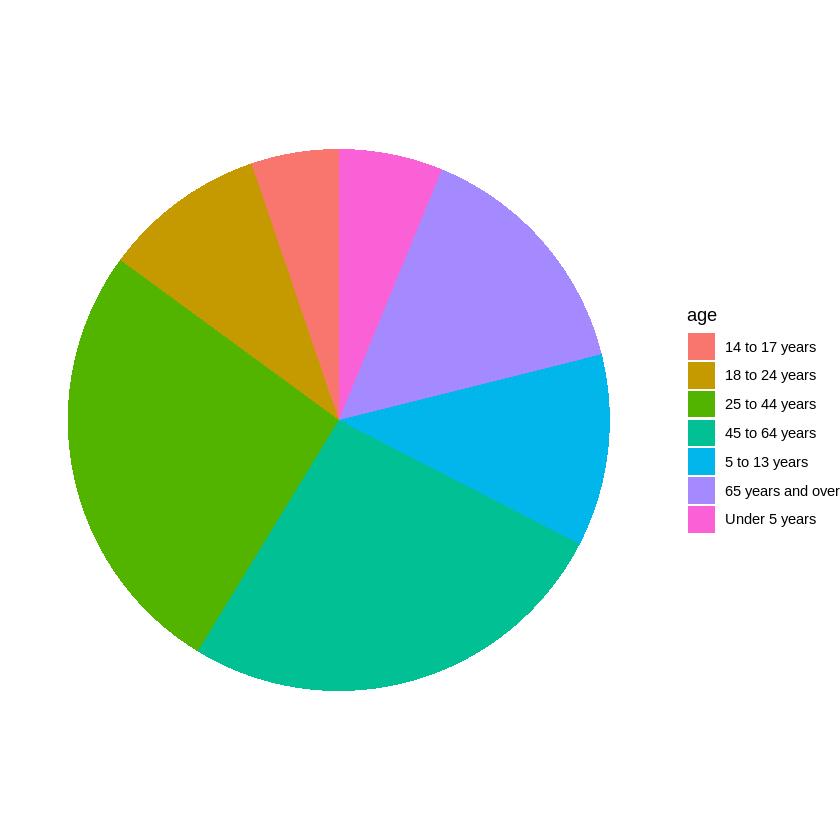

In [15]:
# remember a pie chart really is a STACKED bar chart with a SINGLE (1) bar in a polar coordinate system. 

# use fill to stack a variable's classes in the bar. 
ggplot(pproj, aes(x="", y=pop, fill=age)) + 
geom_bar(data = subset(pproj, year==2015), stat="identity", width=1) +
# which coords ? 
coord_polar(theta="y") +
theme_void()

**Exercise 3:** Create a **pie chart** for similar to above exercise but **only for female population**. 

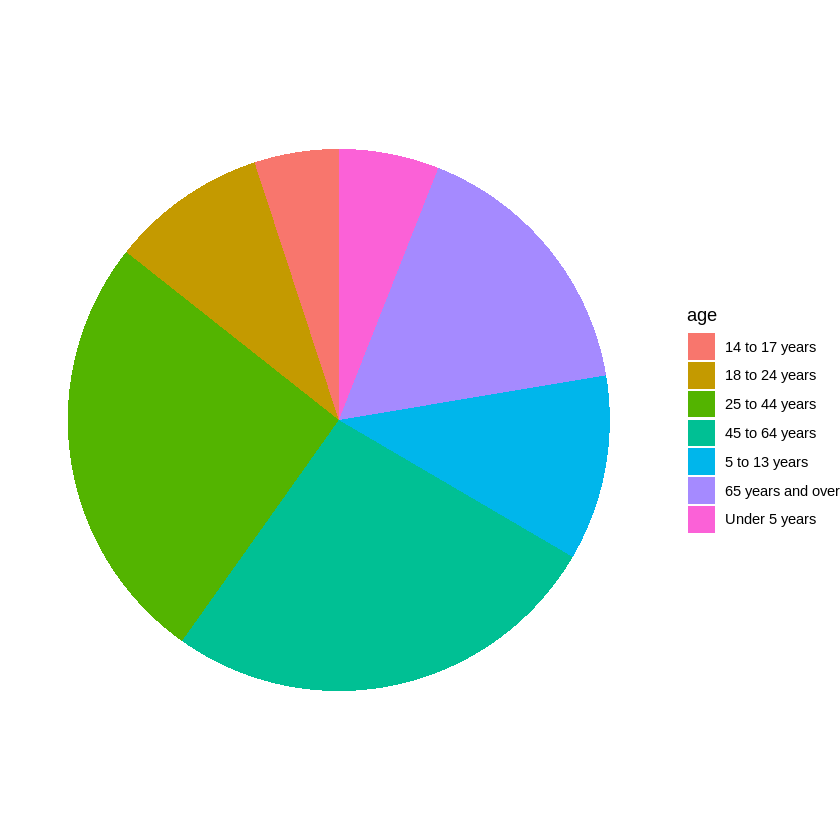

In [45]:
ggplot(pproj, aes(x="", y=pop, fill=age)) + 
geom_bar(data = subset(pproj, year==2015 & sex=="Female"), stat="identity", width=1) +
coord_polar(theta="y") +
theme_void()

**Exercise 4:** Create **pie charts of all years** for total population similar to **exercise 2**. **Use faceting**.

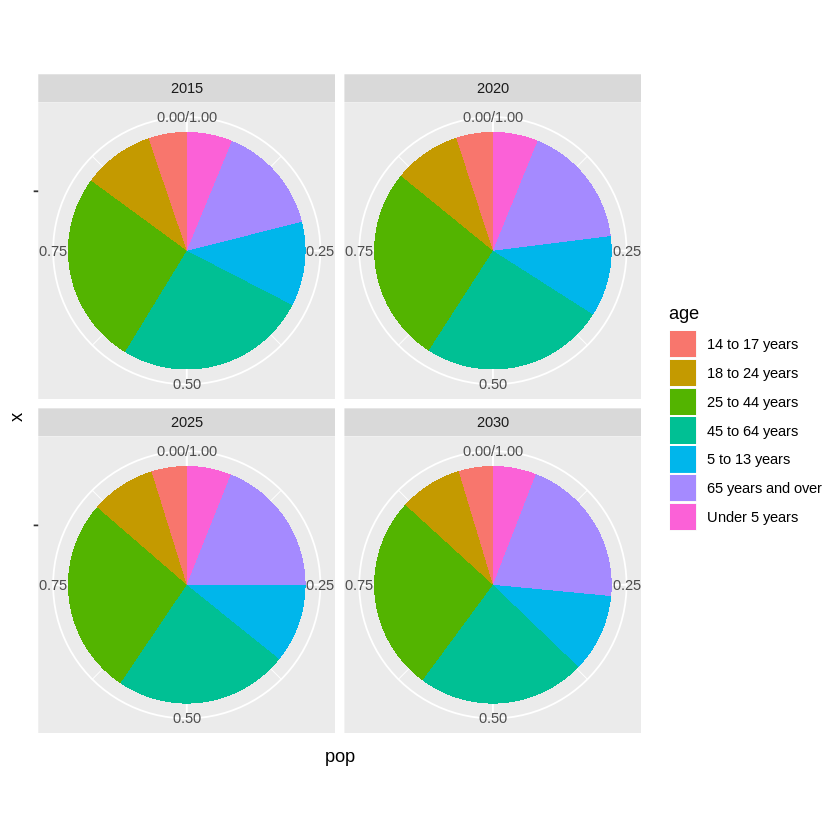

In [21]:
ggplot(pproj, aes(x="", y=pop, fill=age)) + 
# do not forget to use fill position adjustment, see what happens if you don't. 
geom_bar(stat="identity", width=1, position="fill") +
coord_polar(theta = "y") +
facet_wrap(~ year)

**Exercise 5:** Create a **population pyramid for year 2015.** 

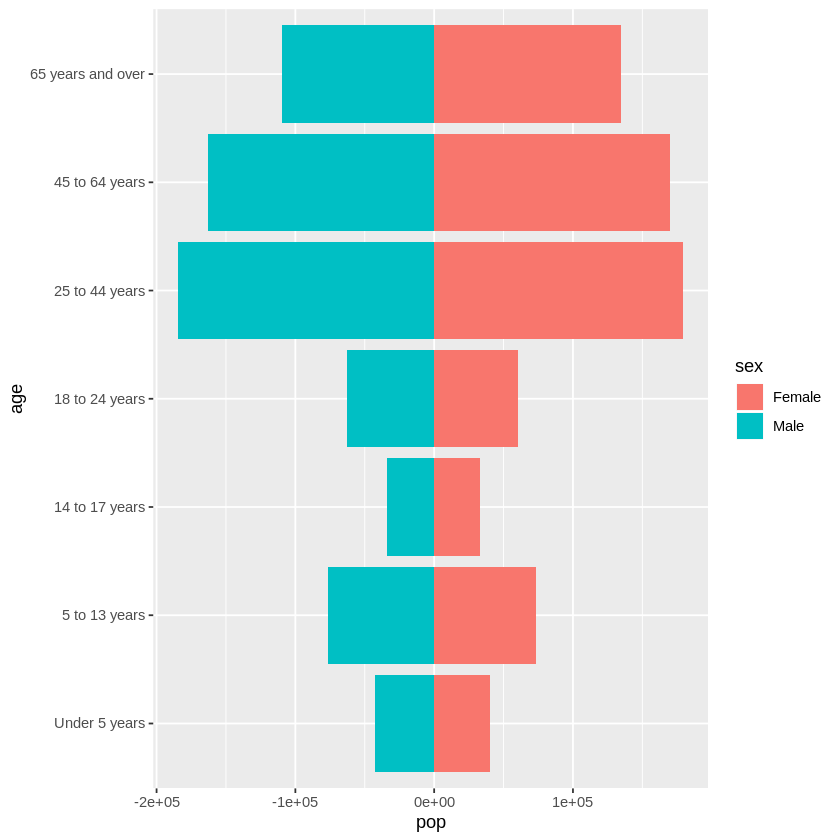

In [25]:
# Look at your practice code and figure out how you could adapt it for this. 

ggplot(pproj, aes(x=age, y=pop, fill=sex)) + 

geom_bar(data = subset(pproj, sex=="Female"), stat = "identity") +

geom_bar(data = subset(pproj, sex=="Male"), stat = "identity", aes(y=-pop)) +

coord_flip() +

# make sure to have ordered axis
scale_x_discrete(limits = c("Under 5 years","5 to 13 years","14 to 17 years","18 to 24 years","25 to 44 years", 
                            "45 to 64 years","65 years and over"))

**Exercise 6:** Create **four** population pyramids for all years. **Use faceting**.  

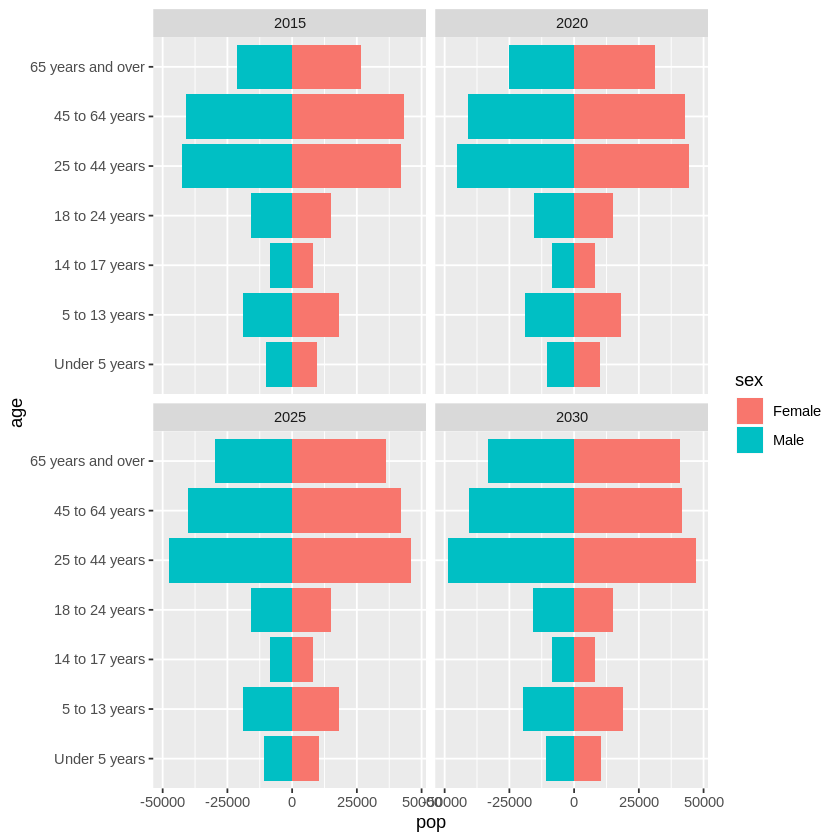

In [26]:
# Look at your practice code and figure out how you could adapt it for this. 
ggplot(pproj, aes(x=age, y=pop, fill=sex)) + 

geom_bar(data = subset(pproj, sex=="Female"), stat = "identity") +

geom_bar(data = subset(pproj, sex=="Male"), stat = "identity", aes(y=-pop)) +

coord_flip() +

# make sure to have ordered axis
scale_x_discrete(limits = c("Under 5 years","5 to 13 years","14 to 17 years","18 to 24 years","25 to 44 years", 
                            "45 to 64 years","65 years and over")) +

facet_wrap(~ year)

**Exercise 7:** Create a **stacked bar chart** to show male and female population projections for **all** years. Hint: year will be encoded by the x position.

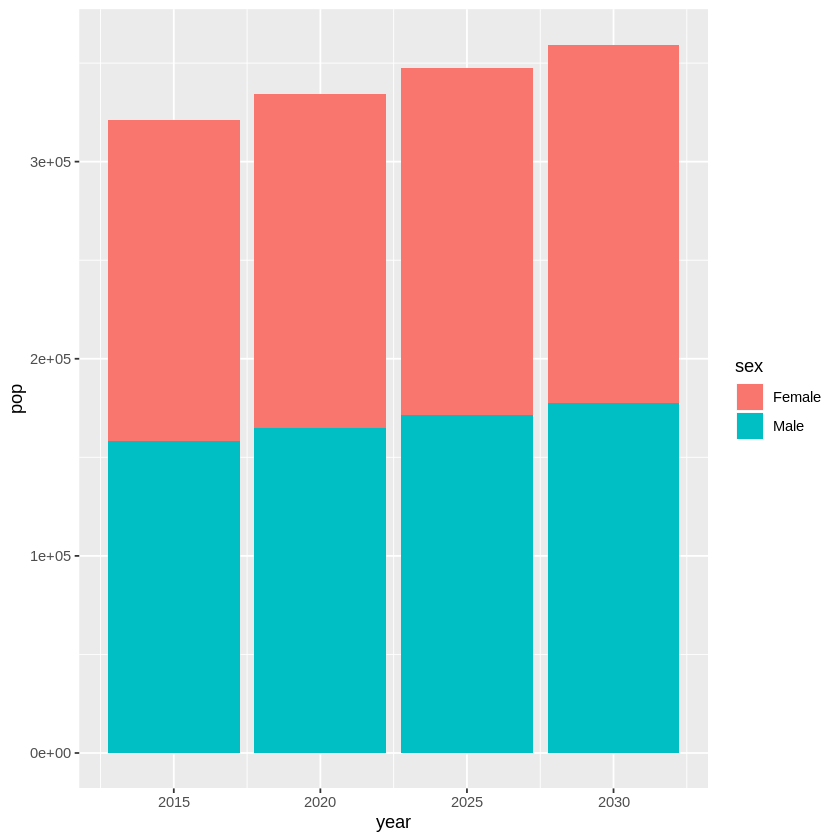

In [35]:
ggplot(pproj, aes(x = year, y=pop, fill = sex)) +
geom_bar(position = 'stack', stat = 'identity') 


**Now, we will read another data set: San Francisco population projections from California Open Data Portal. This data has population projections for each age and ethnicity.** 

**Exercise 8:** Create a **total** population pyramid for year **2015**.

In [36]:
sfoproj = read.csv("/dsa/data/all_datasets/census/SFO_pop_pyr.csv")
head(sfoproj)
summary(sfoproj)

Year,Race_code,Race_name,Gender,Age,Population
<int>,<int>,<fct>,<fct>,<int>,<int>
2010,1,White,Female,0,1579
2010,1,White,Female,1,1358
2010,1,White,Female,2,1212
2010,1,White,Female,3,1083
2010,1,White,Female,4,997
2010,1,White,Female,5,913


      Year        Race_code            Race_name      Gender          Age     
 Min.   :2010   Min.   :1   American Indian :606   Female:2121   Min.   :  0  
 1st Qu.:2010   1st Qu.:2   Asian           :606   Male  :2121   1st Qu.: 25  
 Median :2015   Median :4   Black           :606                 Median : 50  
 Mean   :2015   Mean   :4   Hispanic        :606                 Mean   : 50  
 3rd Qu.:2020   3rd Qu.:6   Multi-Race      :606                 3rd Qu.: 75  
 Max.   :2020   Max.   :7   Pacific Islander:606                 Max.   :100  
                            White           :606                              
   Population    
 Min.   :   0.0  
 1st Qu.:  20.0  
 Median : 207.0  
 Mean   : 600.9  
 3rd Qu.: 862.8  
 Max.   :5079.0  
                 

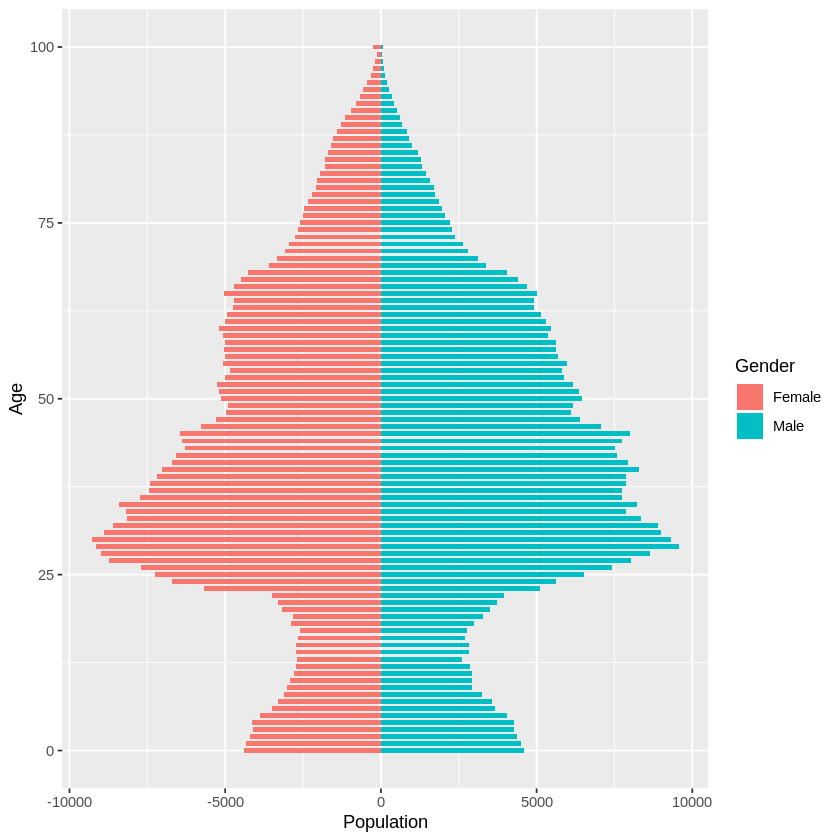

In [44]:
ggplot(sfoproj, aes(x=Age, y=Population, fill=Gender)) + 

geom_bar(data = subset(sfoproj, Year==2015 & Gender=="Male"), stat = "identity", width=0.7) +

geom_bar(data = subset(sfoproj, Year==2015 & Gender=="Female"), stat = "identity", aes(y=-Population), width=0.7) +

coord_flip()




**Exercise 9:** Create a **population pyramid for year 2015, and show ethnicities as stacked bars**. Hint: the only thing you have to change is how the bars will be filled. 

In [46]:
# First we need to create an "ordered" attribute so that both sides 
# of the pyramid are ordered with respect to the order we specify. 
sfoproj <- transform(sfoproj,
       Race_name = ordered(Race_name, levels = c("White","Asian","Hispanic","Black","American Indian","Pacific Islander","Multi-Race")))

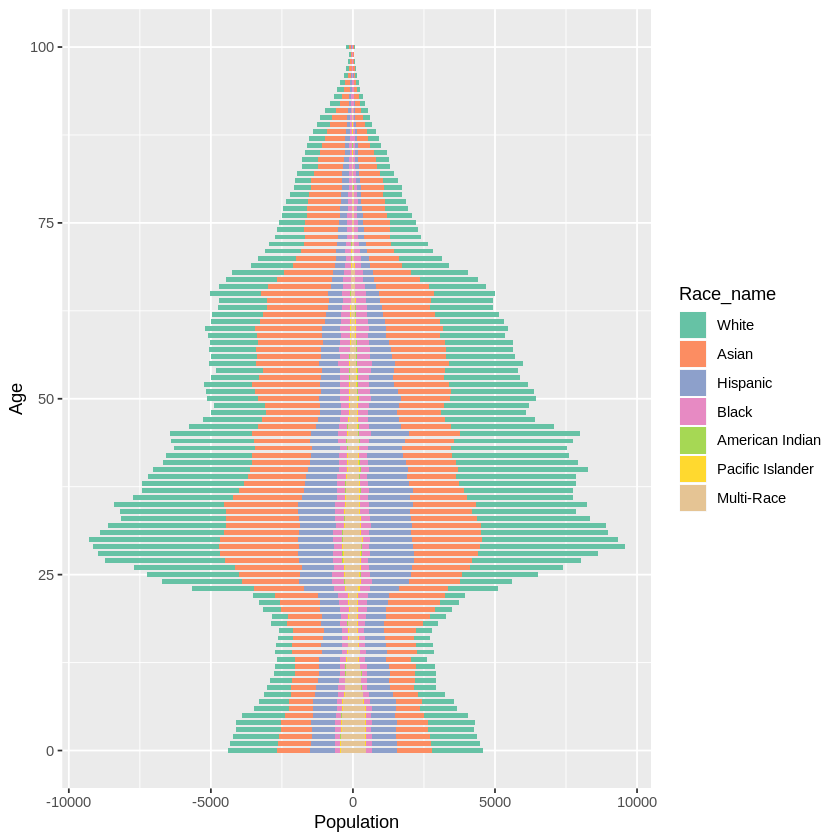

In [48]:
# Now do the pyramid here. do NOT use  position = "identity" for the geom_bar 
ggplot(sfoproj, aes(x=Age, y=Population, fill=Race_name)) + 

geom_bar(data = subset(sfoproj, Year==2015 & Gender=="Male"), stat = "identity", position = "stack", width=0.7) +

geom_bar(data = subset(sfoproj, Year==2015 & Gender=="Female"), stat = "identity", position = "stack", aes(y=-Population), width=0.7) +

coord_flip() +  

scale_fill_brewer(palette="Set2")
 


**Exercise 10:** Create **three population pyramids for years 2010, 2015, and 2020**, and show ethnicities as stacked bars. **Use faceting**.

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    reset: function
    scale_name: brewer
    train: function
    train_df: function
    transf

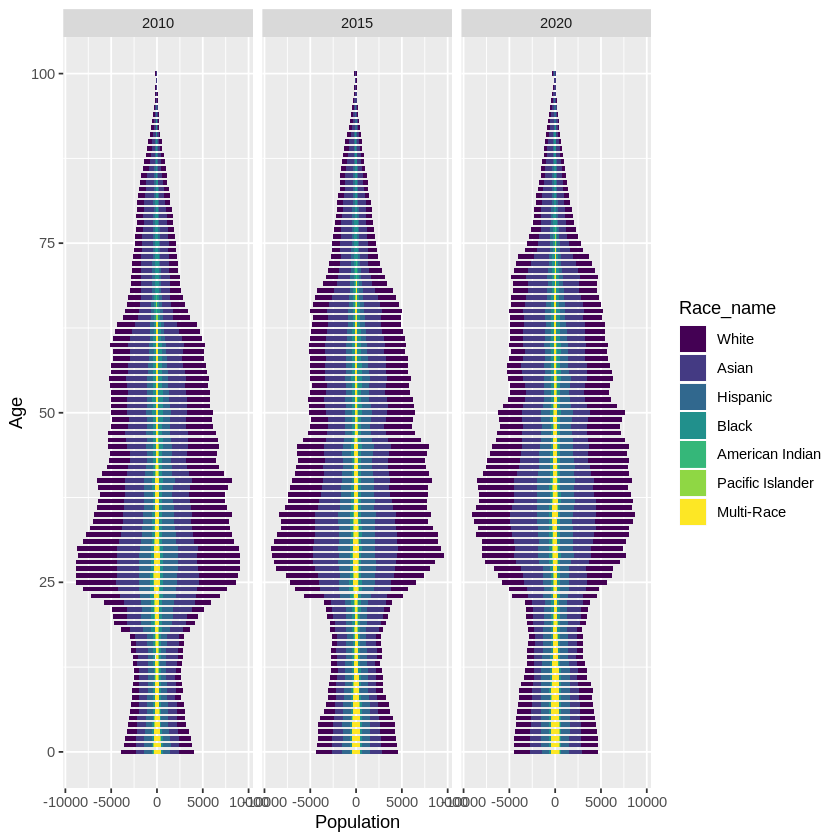

In [51]:
ggplot(sfoproj, aes(x=Age, y=Population, fill=Race_name)) + 

geom_bar(data = subset(sfoproj, Gender=="Male"), stat = "identity", position = "stack", width=0.7) +

geom_bar(data = subset(sfoproj, Gender=="Female"), stat = "identity", position = "stack", aes(y=-Population), width=0.7) +

coord_flip() +  

facet_wrap(~ Year)

scale_fill_brewer(palette="Set2")